In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

# 기생충 크롤링
url = 'https://movie.daum.net/moviedb/grade?movieId=111292&type=netizen&page=1'
webpage = urlopen(url)

source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')
reviews = source.findAll('p', {'class': 'desc_review'})
ratings = source.findAll('em', {'class':'emph_grade'})

review_list = []
rating_list = []

# 1 페이지 네티즌 리뷰 출력
for review in reviews:
    print(review.get_text().strip())
    review_list.append(review.get_text().strip())
for rating in ratings:
    print(rating.get_text().strip())
    rating_list.append(rating.get_text().strip())

돈많은 사람들 밑에서 그들에게 필요한 일을 해주며 사는 사람들을 기생충으로 묘사하다니...
따          봉!

신선했어요. 이런 영화 좋습니다~
너무 재밌었음
도대체  어떻게 이 영화에 1점을 줄수잇지??
수많은 질문과  철학을 말하는 영화


 너무  약함
1
9
9
9
10
10
10
8
1
1


In [12]:
para_review_list = []
para_rating_list = []
for n in range(722):
    url1 = 'https://movie.daum.net/moviedb/grade?movieId=111292&type=netizen&page='
    url2 = n+1
    url = url1+str(url2)
    webpage = urlopen(url)
    source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')
    para_review = source.findAll('p', {'class': 'desc_review'})
    rating = source.findAll('em', {'class':'emph_grade'})

    for review in para_review:
        para_review_list.append(review.get_text().strip())
    for ratings in rating:
        para_rating_list.append(ratings.get_text().strip())
        
file = open('movie_para_review.txt', 'w', encoding='utf-8')

for i in para_review_list:
    file.write(i)
file.close()

In [13]:
import pandas as pd

data_1 = pd.DataFrame(para_rating_list)
data_2 = pd.DataFrame(para_review_list)

In [14]:
data = pd.merge(data_1, data_2, how='outer', left_index=True, right_index=True)
data.columns = ['rating','review']
data

,rating,review
0,1,돈많은 사람들 밑에서 그들에게 필요한 일을 해주며 사는 사람들을 기생충으로 묘사하다...
1,9,따 봉!
2,9,
3,9,신선했어요. 이런 영화 좋습니다~
4,10,너무 재밌었음
...,...,...
7210,10,일단 송강호 나오면 고민없이 볼것임\r이제까지 송강호 나오는 영화는 거의 작품이 괜...
7211,10,봉송진리ㅋㅋ
7212,10,와 내 앞으로도 4명이나 있네 ;;
7213,10,두 시간이 어떻게 지났는지 생각할 겨를도 없이 어느새 엔딩이었네요. \r재치와 유머...


In [15]:
data.to_csv("movie_para.csv", index=False)

In [17]:
data

,rating,review
0,1,돈많은 사람들 밑에서 그들에게 필요한 일을 해주며 사는 사람들을 기생충으로 묘사하다...
1,9,따 봉!
2,9,
3,9,신선했어요. 이런 영화 좋습니다~
4,10,너무 재밌었음
...,...,...
7210,10,일단 송강호 나오면 고민없이 볼것임\r이제까지 송강호 나오는 영화는 거의 작품이 괜...
7211,10,봉송진리ㅋㅋ
7212,10,와 내 앞으로도 4명이나 있네 ;;
7213,10,두 시간이 어떻게 지났는지 생각할 겨를도 없이 어느새 엔딩이었네요. \r재치와 유머...


In [20]:
data['rating'].mean()

inf

In [24]:
data = pd.read_csv('movie_para.csv', encoding='utf-8')

In [26]:
data['rating'].mean()

7.773665973665974

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7215 entries, 0 to 7214
Data columns (total 2 columns):
rating    7215 non-null int64
review    5865 non-null object
dtypes: int64(1), object(1)
memory usage: 112.9+ KB


In [28]:
data['review'] = data['review'].fillna(value='')

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of Rating')

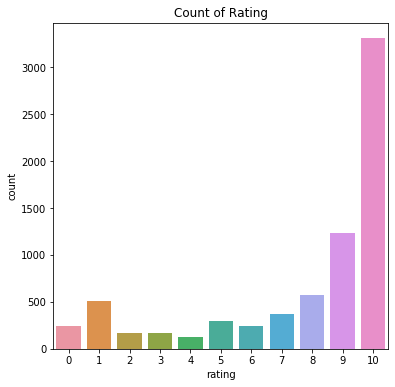

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='rating', data=data)
plt.title('Count of Rating')

In [35]:
from konlpy.tag import Okt

okt = Okt()
word_dic = {}
for review in text:
    malist = okt.pos(review)
    for word in malist:
        if word[1] == 'Noun':
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1
        

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [36]:
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

In [38]:
freq_word_list = []
for word, count in keys[:50]:
    print('{0}({1}) '.format(word, count))
    freq_word_list.append(word)

영화(3746) 
생각(864) 
감독(642) 
것(607) 
기생충(590) 
사람(588) 
봉준호(534) 
이(438) 
그(426) 
현실(388) 
연기(376) 
보고(374) 
수(354) 
더(343) 
사회(322) 
최고(302) 
상(296) 
배우(292) 
말(288) 
정말(284) 
가족(278) 
작품(269) 
장면(266) 
나(266) 
점(254) 
송강호(248) 
냄새(247) 
재미(237) 
왜(232) 
느낌(222) 
스토리(216) 
역시(215) 
우리(213) 
좀(207) 
돈(206) 
시간(204) 
이해(201) 
봉(200) 
부자(199) 
내(199) 
인간(196) 
그냥(194) 
내용(184) 
때(177) 
듯(173) 
기분(170) 
하나(164) 
여운(163) 
기대(160) 
집(155) 


In [39]:
import codecs
from gensim.models import word2vec  # word2vec : 문장 내부의 단어를 벡터로 변환

# 텍스트를 한 줄씩 처리하기
results = []

for reviews in text:
    # 형태소 분석하기
    # 단어의 기본형 사용
    malist2 = okt.pos(reviews, norm=True, stem=True)
    r = []
    for word in malist2:
        # 어미 / 조사 / 구두점 등은 대상에서 제외
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)

# 파일로 출력하기
wakati_file = 'parasite.wakati'
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

# Word2Vec 모델 만들기
data_word2 = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data_word2, size=200, window=10, hs=1, min_count=2, sg=1)
model.save("parasite.model")
print("\n\n분석완료")

돈 많다 사람 들 밑 그 들 필요하다 일 해주다 살다 사람 들 기생충 묘사 하다
따다 봉

신선하다 이렇다 영화 좋다
너무 재밌다
도대체 어떻다 이 영화 1 점 주다 잇다
 수많다 질문 철학 말 하다 영화


  너무 약하다 이제야 보다 포인트 

 불편하다 소리 지껄이다 영화 멍충 들다 의하다 돌아가다 세계 

 절대 변하다 못 하다 내 현실 ㅠ다 아프다 
근데 왜 남 집 서다 술처 먹다 저러다 이해 안되다
우파 들 싫어하다 영화 그러면 명화

사전 TMI 가다 내 판단 무색 하다 만들다 버리다 불편하다 상찬 계층 이간 블랙 코미디
 배우 들 정확하다 딕션 감사하다
두 번 보다 청룡 보고 생각 나서다 또 보다 봉 추다 호 이번 천재 이다 그 중 특별하다 작품 배우 들 음악 미술 모두 미치다 김명훈 배우 남우 조 연상 못 타다 아쉽다 칸 황금 종려 그리고 이제 아카데미 외국 영화상 받다 마땅하다
 송강호 부자 죽이다 전혀 설득 력 없다 냄새 나다 하다 죽이다 딸 아들 칼 맞다 죽이다 그 들 죽다 부자 들 전혀 상관 없다 하다 싶다 이야기 모르다 이 영화 나오다 기득권 혹은 부자 들 꽤 착하다 그냥 없다 사람 들 기생충 것 은지 소문나다 잔치 먹다 없다 겁나다 실망
기생 충
청룡영화상 여우주연상 납득 안되다 납득 조여정 주연 이다 영화 흐름 상 조연 이다 억지로 주연 이다 치다 여우주연상 감 연기 이다 의 구심 들다
너무 현실 적 보고 마음 아프다 영화 프랑스 대혁명 기대하다 역사 너무 빠르다 움직이다 예수 죽 때 무슨 생각 하다
 불편하다 두 눈뜨다 보다 야하다 용기 필요
너무 재밌다 봄 명작 이 스토리 탄탄하다
전세계 영화계 좌파 장악 하다 아주 졸작 이 걸 억지로 위대하다 작품 포장 하다
우화 이다 재현 뼈 있다 메세지 전달 함
 ㅇ 씁쓸하다 기다 여운 남다 생각 하다 거리 많이 던지다 꼭 보다 하다 올해 최고 영화들다 
영화 아주 자다 보다 봉 감독 영화 특징 중 하나 뜬금없이 야하다 장면 나오다 것 살인 추억 굳이 필요하다 싶다 알몸 신 있다 마더 그렇

꼭 욕 들어가다 하나요 1 점 찝찝하다 결말 1 점 두 가지 빼다 완벽하다 충분하다 관객 끝 끌 갈다 수 있다 소재 연기력 박수
역시 봉 감독 영 화답 곳곳 전개 억지 설정 들 보 몰입 방해 하다 시나리오 제발 전문 작가 맡다
서민 서민 부자 부자 각자 다른 시선 보다 영화
굿
웃다 울면 보고 그 밤 악몽 꾼 영화

살인 추억 기생충 하나 더

보다 제목 기 똥찬 영화
  이미 그 냄새 너무 짙다 배 버리다 욕망 다 표현 한 듯 

아주 참신하다 재미있다 계속 강하다 느낌 강약 조절 아쉬움
개천 용 않다 돌 개울 현실 비판 쩌네


 인간 존엄 시궁창 만듬
  반지하 냄새 역설
 또한 있다 자도 그럭저럭 좋다 사람 들이다 하다 악질 비 하다 없다 들다 기생충 생활 보기 싫다 이해도 알다 한심하다
 너무 재미있다 보다리다 없다 
많이 기대하다 대 실망 어디서 기쁨 재미 느끼다 하다 건지다 보고 난 후 얻다 건 도대체 뭐 이딴 영화로 대박나다 게 이해 하 안 간다
와우 충격 적
크다 바위 대갈빡 세다 2 번 연속 맞다 살다 과연 진짜 칸 영화제 황금 종려 상 이다 칸 심사 위원 들 왜 그걸 그냥 넘어가다 의문
 상류층 삶 그 들 돌보다 하류 층 절대 적 필요하다 그 들 특권 의식 문화 몸 베다 저 들 무시 천대 하다 이 세상 함께 살아가다 동반 자 인식 가지 못 하다 인하다 생기다 비극 적 현상 그 들 결국 돈 많다 기생충 삶 살다 것 이 아니다 비판 적 시선 영화로

가난하다 사람 냄새 나다 가난하다 사람 지하 다락방 살다 가난하다 사람 낭만 없다 교양 없이 살다 한다는 고정관념 깊다 박히다 영화 스토리 기발하다 낮다 곳 살다 사람 들 가정부 무직자 등등 기생충 묘사 높다 곳 그저 좋다 것 마냥 생각 들다 하다 이렇다 메세지 들 소름끼치다 싫다 봉준호 란 사람 어떤 사람 보이다
 배우 들 캐릭터 하나 하나 재밌다 편
영화 꾸준하다 설득 그렇다 면 다른 실패하다 영화 다르다 않다 초반 엄청나다 팀웍 완벽하다 재능 관객 무시 그렇게 심하다 하다 가정 세 팅 하다 그


보고 후 왜 이리 찝찝하다 ㅠ ㅠ 배우 들 연기 7 점 드리다 너무 기대하다 보다 하다
흠 ᆢ 블랙 코 메다 같다 극단 적 소재 자다 풀다 ᆢᆢᆢᆢᆢ 잔인하다 장면 외국 애 들 딱 좋아하다 스토리 ᆢᆢᆢᆢᆢᆢᆢᆢ 만점 가다 ㆍ 훌륭하다 근데 뭔가 찝찝하다 남다 영화
 생각 끝 아니다 나 행동 과제 남기다 영화 과연 상의 적절 성 느끼다 하다 영화 이다 
 사다 차다 잘 보다 시유 
 숨다 이야기 저 도 죽  죽다 죽 

 생각 가볍다 말다 거지 싶다 
좌절 감 목 매달 싶다 기분
  역사 증명 하다 강인하다 민초 대한민국 국민 일본 기생충 비유 하다 영화 만들다 그렇게 역사 왜곡 대국민 송 강 호가 만들다 네 고 궁금하다 지다 애 들 그렇다 다니다 애 들 뭘 보고 배우다

간만 좋다 영화
아 눅눅하다 반지하 지하 살다 주제 임
 너희 자본주의 노예 들 아니다 예술 게 별거 없다 차다 ㅉㅉㅉ

YES or NO 로 스토리 직접 고르다 육 성 게임 짓궂다 선택 하다 결말 어떻다 되다 궁금하다 하다 적 있다 것 봉준호 정말 짓궂다 선택 시키다

슬프다 자화상
자다 보다
 송강호 반성 하다 것충 ㅆㄲ 들다 
최고 영화
배우 들 연기 다 들다 너무 좋다 두 번째 보다 더 많다 게 보이다 영화
최고


 씁쓸하다인생  
먹다 먹다 함 지속 되다 듯 하다 장면 장면 의미 대사 한마디 놓치다 없다 집중 력 저절로 끌다 모으다 주다 좀 씁쓸하다 현재 내 살 있다 사회 점 부정 하다 수 없다 하지만 자식 권하다 싶다 않다 영화 ㅎㅎ
깝 치면 칼 맞다 늘 기억 하라
씁슬 서민 들 발악 그리고 추잡하다 상위 1 프로 내면
 밤 파티 중 번개씬 사건 이후 계단 런 씬 정말 소 오름 좋다
여운 오래 가다 영화
 상 받다 만 하다 생각 들다 간만 자다 만들다 한국영 화 보다
영화제 대상 받다 하다 그 들 리그 베스트 추천 작 남다

몰입도 짱 이다
너무 극단 적
빈부 격차 없애다 힘들다 어떻다 완화 하 늘다 정부 역할

신분 제도 언제나 존재 하다 지금 철폐 되다 보이다 우리 같다 사

 역시 봉준호 감독 뭐 알 무 계획 


내용 없다 현실 성도 없다 마무리 아니다 같다 이 영화 왜 유명하다 나 원 차다 중간 잠깐 웃다 3 점 주다

  그렇다 맞다늘다 절대로 이렇다 일이 안 생기다 어떻다 하다 
작품 성 상업 적 완벽하다 보다 역시 봉 감독 시간 가다 모르다 보다 긋다 이다

블랙 tragic 코 메다 완성 작
들다 냄새 나 전쟁
 주인 없다 파티 가정부 남편 지하 생활 등등 저 평점 10 점 만점 4 점 이다 끝

진짜 재다 역시 봉 짱

나 나 악취 맡다 것 기분 더럽다 재밌다
자본주의 사회 단점 극명하다 보여주다 영화 이다 보다 아찔하다
 그러나 나름 신선하다 주제 좋다다 장면 들 
상 받다 하다

이정 예산 이정 영화 봉 감독 이하 배우 들 나오다 신기하다
아 대박 왜 영화 제목 기생충 ㅋㅋ 초반 보다 뿜었습니
 그 후 불편하다 들다 사다충 하 


영화 전체 적 개연 성 떨어지다 막판 특히 억지로 칼 휘두르다 모습 대 실망
내 취향 영화 아니다 기대 안 관람 하다 재미있다
재미 있다 가난 씁쓰름하다
꼭 보다

살다 이렇다 완벽하다 영화 처음 이다 만점 부족하다 영화
 그래도 정말 재믹 보다다 찜찜하다 남 보다 

힘들다 우울하다
봉준호 감독 천재 생각 하다 좋다 영화 모든 요소 가지 있다
꿀잼
 많이 궁금하다 어떻다 면 크다 점수 받다 건지다 어다 건 공감 하 개인 적 씁쓸하다 마음 드네  시간 그렇게 유쾌하다 않다 
끝나다 때 예측 안되다 너무 재미있다 영화 이다 끝나다 나서다 계속 생각나다 영화
스밀라 이 새 기 늘다 재밌다 본영 화가 뭐임 다 재미없다 영화 보다 무뇌
자랑스럽다 영화
플란다스 개 찍다 그 봉준호 어디 간 걸다 정말 대다 실망
 이렇게 완벽하다 영화 또 보다 있다
영화 평점 낮다 계속 머리 속 메다 도 영화 다시 보다 좋다 한 데
재미있다 연기력 훌륭하다

자다 보다
세번 보다 좋다 영화


 현실 보여주다 왜 계층 간 편견 갈등 조장 다 고 보다 ㅋㅋㅋ 그렇게 머리 나쁘다 나무 위키 있다 영화 해석 보고오다 

정말 감동 이다

유전 무죄 무전 유죄 진정하다 기생충 누구

우리나라 관객 분들 수준 칸영화제 심사 위원 수준 이다
봉준호 영화 중 제일 쉽다
단연
 제목 기생충 의 의미 점점 이해 하다 되다 정말 독특하다 괜찮다 영화

방금 보다 머리 복잡하다

 연기 들 차다 잘 하다
보다 오만 생각 다 들다
내 생애 다시다 보기 힘드다 영화 생각 하다 보다 찝찝하다 수도 있다 머리 계속 맴도 영화
상쾌 깔다 끄다 거리 멀다 찝찝하다 평 하다 계속 이렇다 저런 것 들 생각 하다 하다 영화 이다 반전 감독 의도 다 느끼다 것 같다 의도 따라가다 자다 만들다 다시 한번 보다 좋다 하다 정도
개봉 날 보고오다 뒤통수 맞다 기분 잠 못 들다
근래 보다 영화 중 가장 대단하다
기생충 양극화 되다 사회 서사 인간 추악하다 본성 관 고발 블랙코미디 적 방법 풀다 나가다 영화
송강호 주연 영화 중 송강호 존재 감 제일 없다 영화 그만큼 다른 배역 들 다양하다 잘 하다 특히 조여정 처음 어색하다 하다 제일 존재 감 있다 이 영화 그저 재미있다 상업 영화로 생각 보다 사람 기대 못 미치다 있다 그러나 그렇다 의미 보다 영화 아니다
재밌다 치밀하다 영화 관객 9 백만 되다 영화 스포 자다 피하 다가 오늘 봄 봉준호 감독 작품 괴물 설국열차 정도 봄 캐릭터 하나 하나 자다 살 있다 끝 너무 잔인하다 면도 있다 개인 적 희망 하다 결말 이중 적 다 자다 살다 로 끝나다 바르다 편하다 여러 번 볼 수 있다 한국 오락 영화 많이 나오다 좋다 자연 위장 그 들 침투 력 박수 짝짝 짝
Good
해롭다 영화
 역시 신세계 짱


가정부 집사 아줌마 젤로 기억 남다 ㅋ

 역시 상 받다 하다 내용 가요 
봉 감독 말 오만 가지 생각 하다 하다
우리 사회 여러가지 자다 표현 해주다 영화
  누군가 죽다 제거 해 주다 좋다 가족 들 전라도 사람 임 암시 전라도 사람 들 기생충 무언 메시지 보내다 아주 악질 적 봉준호 감독 만들다 영화 전라도 사람 들 봉준호 감독 절대로 용서 하다 말다 하다 
Good
왠지 

 봉 감독 디테 일이 환상 적임 없이 보다 영화 판치다 영 화판 오아시스 
전 반 부 재밌다 후반 부 들어서다 아씨 괜히 보다
많다 것 생각 하다 보다 하다 영화
소름 몇번 경험 하다
시간 갈수록 착잡하다 블랙코미디 현실 직시 하다 봉준호 눈
예고편 전부 영화 과자 봉지 멋지다 명품 줄 샇더 차이나 이다
그냥 그렇다 나 심사 위원 들 다른 생각
그냥 안 더럽다 안 잔혹하다 안 폭력 적 누누 구들 싫어하다 같다 영화
 한동안 멍하다 채다 영화 
 봉준호 감독 위력 다시 한번 느끼다
그냥 말 그대로 기생충 같다 영화 이다
 보고 뒤 기다 여운 남다 영화

 영화 보다 후 계속 생각 걸 하다 만들다 영화 한번 더 보다 영화
 한번 더 보고 싶다
 자기 위치 따르다 다른 관점 해석 하다 영화
보고 후 기다 여운 남다 영화 두 번 보다 더 좋다



나 저 두 계층 중 어디 쯤 살다 씁쓸하다
봉준호 감독 영화 정 주행 하다 의미 심장 하다 칸느 기립박수
쥣 재밌다
 돈 주다 맑은 영혼 똥물 뒤지다 쓸다 기분 이다
어떻다 의미 뭐 따다 않다 오락 영화로 보다 넘다 재미 영화 가난 대한 비난 생각 비어 있다 행동 빈한 그렇다 사람 들 조합 것 같다 돈 많다 부자 가족 사실 상 인간미 동 정심 비어 있다 사람
생각 없이 산 사람 들 불편하다 생각 해보다 진실 가깝다 영화
 정치 적 이용 안되다 기르다다 
 디테일 설정 배우 들 연기 시간 가다 모르다 보다 
어이 없다
설정 자체 너무 어이없다 영화 이다
그렇다 있다 하다 영화

 늘 중요하다 메시지 있다다 

 더럽다 좌파 영화
현실 불편하다 보다 야하다
땅 밑 하늘 몇 층 살 지금 이대 로라 모두 찾아오다 운명 개죽음 뿐 이 현실 코미디 아니다 무었 표현 하다 봉준호 이 시대 거장 되다 듯

well made
재밌다 잘 보다 현실 자다 반영 영화 이다
여러 가지 생각 하다 하다 영화

이 왜 상 받다 건지다 전혀 모르다 옥자 설국열차 같다 다른 영화 비다 얻다 만 메세지 감동 없다 중간 중간 대체 왜 있다 건지다 알 수 없

parasite helminth 蟲 University of Oxford in department of forgery
숨다 속 뜻 함축 적 내용 뒤로 그냥 괜찮다 드라마 한편 보다 느낌
 완전 콩가루 집안 비 현실 적 설정 들다 
작품 성 좋다 뭐 어떻다 좋다 말 들 난무 하다 보다 진짜 이렇다 영화 상 받다 신기하다 정도 가족 원래 사기 7 범 이다 앞뒤 안 맞다 뭔 빈부격차 노골 적 보여주다 말 안되다 개 소리 만들다 드
 공생 아니다 기생 하다 사회 결국 파멸
무언가 보여주다 위해 설정 너무 지나치다 비현실적 않다
 명절 때 시간 나다 TV 로 시청 하다 걸크게 만족 않다 영화 
결말 조금 아쉽다

기생충 들 싸움 씁쓸하다
기생충 더 벌레
별로

뻔하다 걸 안 뻔하다 보여주다 뻔하다 생각 하다 저 돌아보다 되다 볼 때 보다 다시 생각 하다 때 더 즐겁다 수수께끼 푸다 느낌 봉 메다
 차다 잘만 영화인 듯 하다 
배우 들 찬사 보내다

아메리칸 뷰티 생각나다 하다 영화 임 박사 장 최소 양심 없다 돈벌레 마지막 쓰러지다 자다 피 흘리다 기택 딸도 같이 병원 가다 하다 고 기택 가난 부끄럽다 아니다 아이 들 최소한 떳떳하다 살다 법 가르치다 하다 않다 끝 비겁하다 어이 없다 차라리 교도소 가지 거기 감옥 뎅

봉준호 천재

봉준호 감독 대단하다 새롭다 느끼다 영화 이다 정말 몰입 하다 보다 배우 들 모두 연기 정말 대단하다 완전 극찬 싶다 영화
연기 반하다 스토리 반하다 끝나다 많다 생각 하 하다 싫다

가난하다 하다 사람 들 감정이입 하다 되어다 찝찝하다 많이 느끼다 같다 근데 영화 내용 부자 집 짜증 내야 맞다

보통 보다 보다 뒷이야기 대충 짐작 가다 이 영화 계속 새롭다 전개 긴장 끈 놓다 없다 그렇다 의미 굉장하다 신선하다 이렇다 낯선 시각 보여주다 봉준호 감독 님 대단하다 보이다 영화 끝 난후 영화 적 복선 의미 하다 바르다 신랑 대화 하다 다시 그 의미 깨 달다 사람 들 기생충 기생충 하다 싶다 아 글 이 것 울 신랑 해석 물난리 나다 때 아들 

 그런데 뭔가 엽기 적 코믹 스럽다 찝찝하다 알리다 
재미있다 하다 밋밋하다 기분
봉 감독 영화 칸 상 받다 보다 영화 영악 설정 너무 과 하다 영 화란 모름지기 볼때 편하다 재미있다 감동 적다 기발하다 설정 좋다 자연스럽다 움 편안함 덜하다 상 받다 빼다 오히려 전작 들 훨씬 좋다
  노랗다 조끼 혁명 겪다 내다 프랑스 칸 왜 기립박수 받다 알 하다 그 이상 더 못 하다 그 이유 풀다 내다 역작 프롤레타리아 프롤레타리아 임 망각 채 다른 프롤레타리아 공격 암흑 속 프롤레타리아 반지하 프롤레타리아 아주 잠깐 반지하 프롤레타리아 천민 부르조아 무너 뜨다 그치다 역시 계급 차별 무너 뜨다 못 다시 암흑 속 프롤레타리아 잠수 타네 
 그래도 2시간 은 순식간 지나가다
 이런 것 고 유정 살인마 좋아하다 ᆢ다 알 ᆢ 풍경 이쁘다 태 의심스럽다 
영화 자다 만들다 연기 시나리오 좋다 영화 오래 간이 네 이렇다 영화
정신없이 재밌다 몰입 하다 본 영화
 하다 이 영화 과연 상 받다 하다 갸우뚱 해보다
정신 없이 보다 크레딧 올라가다 멍하다 영화
재밌다 신선하다

영화 절대 번 보다 적 없다 낼 또 보다 간다
곱씹다 보다 되다 영화
두 번 보다 몰입 너무 잘 되다 영화 같다
왠지 모르다 한번 더 보고 싶다
공감
보이지 않다 곳 살아가다 수 많다 사람 들 불편 고통 가난 보이다


 화제 성 비다 재미없다
이런 영화 첨 보다 돈 메주 상 타다 90 점 점수 주다
중간 나오다 영화 처음 아 내 돈 보다 불편하다 영화 처음 난 칸영화제 수준 안되다 아줌마 봄
굿 재밌다 역시 봉준호
어떻다 분 들 불편하다 주다 있다 개인 적 봉 감독 님 한 단계 진화 하다 평 하다 싶다 마지막 계획 아마 이뤄지다 순 없다 그래서 여운 남기다 선악 구분 무너지다 세상 돈 권력 지배 하다 당연하다 여기다 얼마나 인간 파괴 하다 화두 넘다 강 추하다
전혀 기대하다 않다 영화 2 번 보다 처음 놓치다 장면 대사 이해 하다 보다 결코 가볍다 않다 영화 명작 이다 저 신경선 약하다 사람 계속 잔 상이 떠오

  그래서 우리 상생 하다 하다로 서로 기생충 되다 세상 

저 재밌다 보다 보다 너무 잔인하다 너무 야하다 너무 내 용이 다크 가다 생각 하 보다 그렇다 않다 보다 많다 생각 하다 또한 완전 결말 미궁 아니다 좋다 사람 보다 견해 틀리다 보다 판단 하다 좋다 같다 ㅎ
 부자 사람 부자 인 양쪽 모두 모욕 하다 영화
역시 봉테일 디테일 감탄 하다 되다 대충 보다 주 제 의식 뚜렷하다 역시 황금종려상 받다 영화인 것 같다
 장면 없다있다 버리다  맞다 
그 저 그런 영화
이영화 청소년 보다 안 돼다 ㅋㅋㅋ 요 증 청소년 뭘 알
 그래서 5 점 이다난 후 제 기분 3 점 정도 

갈수록 더 커지다 빈부격차 현실 적 더 슬프다

재미있다


황금 정려 상 받다 작품 생각


설국열차 성북동 버전
영화 전개 굉장하다 파워 풀 하다 개인 적 봉준호 감독 작품 중 최고 이다
ㄱㄱㄱ
넘다 넘다 굿굿

 다시 하다 번 보다 하다 같다상 

저 냄새 나다 해보다
 그래서 1 점 빼다다  해주다 싶다  되다 의미 들   장르 불분명   
칠 번방 기적 같다 신파극 10 점 주시 분 기생충 보지 말다


가난하다 이유 온 가족 뭉치다 사기 결국 은 평범하다 한 가족 불행 파멸 길 이끌다 자신 가족 대한 연민 보이다 뿐 주인 가족 대한 어떠하다 죄책감 느끼다 않다 인간 이기심 추악하다 모습 보다 기분 나쁘다 찝찝하다 영화
절대로 올라가다 없다 현실 직시 하다 다솜 이 보다 귀 신 모습 자꾸만 웃음 나오다
관람 등급 왜 15 인지 이 영화 자라나다 청소년 들 심하다 좋다 않다 아이 들 생각 사고 틀 가두다 있다 때문 빈곤 대해 잘 못 되다 생각 가지다 또한 지금 현재 반지하 살다 그렇다 학생 들 모멸 감 주다 나 이영화 등급 정말 잘 못 되어다 생각 하다 빈곤 악순환 굴레 그 단어 생각나다 하다 정말 영화 보다 찝찝하다 기분 좋다 않다 영화 영화 어쨌든 자본주의 사회 치부 대해 자다 그리다 내다

두번째 보다 좀 더 이해 하다 있다 같다 한번 더 보다
상상 하다 없다 스토리 재다 보

공포 않다 공포 감
 웬만하다 보지 말기 권하다수 관객 몰입 하다 힘드다 불편하다 극한 쥐다 짜내다 지치다 영화 
자다 만들다 영화 맞다 재미 있슴 그런데 나 당하다 없다 너 보다 바 하다 느낌 집 오다 내내 짜다 했슴
 공포영화 보다 같다 느낌

계속 생각나다
  송강호 분 노 지존파 분 노 비슷
선 넘다 말다 바뀌다 없다 자본주의 계급 사회 비판 탄탄하다 스토리 영화 만들다 봉준호 감독 찬사 보내다
또 보고 싶다 재미있다 너무 시간 빨리 가다 같다 송강호 주연 영화 전부 시간 빨리 흐르다 것 같다
설정 시나리오 신 박하 좋다
초반 주인공 가족 한 명 한 명 들어오다 때 재밌다 그 뒤 분위기 바뀌다 아버지 역 송강호 제일 감정이입 되다
재미 없다
좀 피곤 답답하다 그래서 세네 갈전 재방 보다 기 분업 시키다 보다 그래도 영화 좀 힘드다 괜히 보다 개인 적 취향 차이 좀 알고볼껄 끝나다 아무 한마디 안 걸다 그것 처음
기본 예의
시계 방향
재미 없다 보다 나오다 버리다
봉준호 천재 영화 보다 계속 생각 하다 만들다 영화 연출 잘 하다 잘나오다 영화 아니다 출연 배우 모두 최고 연기 하다 있다 음악 훌륭하다 재미 위 영화 아니다 이렇게 자다 만들다 수 있다 재미 없다 하지만 계속 remind 하다 만들다 영화 여러 방면 해석 가능하다 영화

재미없다

엄마 보다 신랑 또 보다 돈 아깝다 않다

재미있다
소문 무 성함 ㅠ

 이 영화 보고 정말 소름 돋다말 대단하다 사람 생각 하다 
개인 적 곡성 이후 한국영 화 중 최고 아니다 곡성 이후 개봉 되다 외화 합치다 최고 작품 성 사회 바라보다 시선 깊이 그리고 그것 풀다 빈틈 없다 연출 모든 것 살다 꿈틀 거리 그리고 그 생동감 메시지 영화 시작 끝 끝 지속 되다 수작 중 수작 듯 싶다

매우 충격 받다
신선하다
조여정 재 발견

재미있다 보다
하다 번 더 보고 싶다 잔인하다 장면 때문 망설이다 암튼 최근 보다 영화 중 생각 하다 만들다 영화 얐음
보고 후 가슴 먹다 먹다 함
처음 보다 때 두번째 볼 때 더 재미있다

마지막 영 찝찝하다
불편하다 현실 이 신 박하
보다 보다 그냥 무엇 찝찝하다 이 기분
올해 최고 영화
너무 심각하다 음료수 마시다 잊다 몰입 하다 영화 초반 막 화나다 중반 헐다 하다 보다
칸 영화 어렵다 지루하다 줄 알다 예상외 전계 눈 떼다 수 없다 오늘 살인 추억 다시 꺼내다 볼 예정 이다

 직장 동료 최악 고함 다 늘다 
역시 봉 감독 다 들다 봉 잡다 감축 드리다 감사하다
 봉준호 숨기다 매력 찾아가다 영화
완젼 재밌다 드 만
황금 종려 상 그 이상
 다시 꼭 보다 계획 세우다 보다다 
기생충 나오다 보다 보고 온 후 그냥 머 나오다 오늘 알라딘 보다 근데 이제 알다 기생충 정말로 괜찬 영화인 줄 나름 생각 하다 만들다 부분 이해 되다 부분 있다 머리 남다 기생충 영 화이 네
이 뭔가 허허
 고맙다이 보다 않다 기생충 제 인생 영화 이다 



20 대다 시절 빌라 방 하다 칸 살다 냉장고 화장실 공유 하다 그 때 생각나다 공감 되다 내용 많다 하다

반지하 냄새 서글프다
재밌다 지금 괴물 최고 1 점 빼다
극 호불호 갈리다 영화인 듯
감독 말 관람 후 갖가지 생각 다 들다 영화 네
 현실다 보지 지하 늙다 같다  

봉준호 감독 설국열차 좋아하다 저 재미있다 보다 은유 간접 적 상징 섞이다 이렇다 영화 좋다 재미있다 왠지 진지하다 보다 되다 영화
뭔가 생각 많아지다 영화
dr 프리즈 너 조금 미묘하다 스릴러 식 드라마
보다 기대 반 우려 반 그러나 몰입 하다 재미있다
도무지
영

 마지막 부분 조금 더 빨리 진행 돼다 어떻다 하다 아쉬움 남다 볼 수 있다 
 재밌다 재미없다 않다 이다 깊다 뜻 있다 않다 
영화 보고 기분 안좋다 것 너무도 지독하다 현실 닮다 때문
돈 아깝다
재미 있다 매우 불편하다 난 저리 되다 싫다 ㅡㅡ
정말 대한민국 다음 세대 관심 있다 이렇게 노골 적 장면 넣다 뉴스 홍보 하다 마당 15 세 관람 가라 내용 연기 빼 고서 이 것 거짓 다음 세대 미치다 악 영향 어쩔 건가 당장 19 금 표시 하다

굿
이렇게 쉬다 만들다 이해

마무리 너무 이상
15 세 맞다 겁나다 묘 이상하다 기분 들어서다
높낮이 따르다 변하다 비열하다 인간 군 상의 모습 들 사람 위 사람 없다 사람 아래 사람 없다
지금 한국 가난하다 생활 오감 확인 시키다 더욱 각인 시키다 영화 보다 더욱 더 우울하다 마음 무겁다 영화 현실 아니다 마지막 마무리 그렇게 하다 하다
개봉 2 틀 째 지난주 보고 후기 이제 써다 보내다 그냥 보다 되다 말 필요없다 많다 것 생각 하다 하다 영화 시나리오 이야기 이어지다 의외 성 배우 들 열연 등 극찬 받다 만 영화 같다 저 영화 2 번 안보 사람 왠지 이 영화 하다 번더 보고 싶다
 전 정말 자다 보다다 생각 하다 되다 봉준호 감독 님 대단하다 생각 들다 모든 캐릭터 하나 하나 퍼즐 딱 들어맞다 자기 역할 제대로 해내다 달다 

알바 많다 5 점 이상 줄 내용 작품 성은 없다 감독 수준 알다 돈 내다 보기 비추다 이다
이영화 재미없다 본 사람 취향 차라 생각 은 이해 하다 있다 아무 의미 없다 생각 하다 사람 들 그저 영화 묘사 하다 내일 대한 계획 없이 그저 살아가다 사람 들 이기 때문 뭐 기생충 공감 못 하다 자신 기생충 취급 싶다 사람 얼마 없다 껄
 조만간 하다 번 더 가다깝다 생각 
아직 보다 않다 엄청 기대 되다
 상류층 서민 층 그것 보다 중간층 모두 불편하다 듯
 쌍욕 안 하다 영화 안되다 같다 은퇴 하다 인기 먹고살다 인격 제로 기생충 보이다  선도 순 화해 야하다 의무 있다 수준 급 감독 인기 편승 하 자식 들 부모 앞 쌍욕 하다 철 없다 관객 배우다 반지하 살다 사람 기생충 믈 연상 시키다 도우미 가정부 기생충 비유 되다 부자 다 멍층 
좋다

7 점
재밌다 하다 보다 나오다 사람 이해 안감
방금 영화 보고 나오다 바퀴벌레 들 끼리 싸우다 지다 들다 리 죽음 그나마 송광호 주인 집 남자 찌르다 그나마 저항 라면 저 항일 끄다 여 틀다 ㅇㄹ 짜증나다 ㅋㅋ
같다 공간 있다 누군가 위 누군가 아래 살다 하다 세 상사 우스꽝스럽다 아프다 그리다

 지난주 보다 신랑 지금 

 여 틀다 우린 깨다 하다다 
특히 수 구 꼴통 들 이 영화 너무 수준 높다 것


 계급 문제 아니다 도덕 문제 아닐런지
심사 위원 만장일치 자본주의 사회 현실 전세계 마찬가지 란 역설
  신선하다 시나리오 연출 완성 높다 영화 재밌다
한번 더 보다 영화 왜 끝나다 오만 가지 생각 들다 걸다
보다 내내 사회 정의 적 맘 불편하다 영화 이다 몰입도 100% 연기자 대단하다
 그리고 그런 생각 하다 나다 같다 사람 생각 서서히 쌓이다 분노 나중 분노 아니다 그건 내 삶 망치다 그땐 그게 최선 이기않다 
현실 픽션 오가다 관객 마음 습기 가득 찬 꾹꾹 지하 단칸 방 끌 들어가다 영화 사실 대 저택 지하 단칸 방이 인간 모 여사 곳 다 생지옥



 봉 감독 님 연기자 분들 천재 이다시간 이 훌쩍 어떻다 지나가다 ᆢ 
 혼자 보다 잘 하다 생각 들다 아이 들 같이 가지 말다 15 세다 아니다 영화

  네티즌 평가 야하다 낯 뜨겁다 영화 하다 기대하다 가다 근데 전혀 야하다 영화 아니다 요건 실망

보다 내내 재미있다

마지막 결과 봉테일 스럽다

많다 생각 가지 만들다 영화 18 세 이상 하다 되다
조연 들 연기력 정말 좋다
 왜 봉 감독 님 이 신지 알다 해주다 영화 하다 살다 교훈 촬영 잘 하다 

 도시락 싸 들다 못 보다 말리 싶다질 의심스럽다 
직접 보다
프랜차이즈 사업 위험성 가장 자다 표현 수작
살기 위해 기생충 끼리 싸우다 야하다 슬프다 현실
기생충 처럼 찌질하다 살 선 지키다 니 들 억울하다 돈 벌다 이 영화 메시지 불쾌하다 넘어서다 분노 치밀다 오르다
어떻다 이렇다 시나리오 나오다
역시 봉준호 생각 들다 영화 영화 단순하다 않다 생각 많이 하다 하다 보고 나다 뭔가 얘기 싶다 많다
 너무 김 기사 같다잊다 


정말 많다 생각 들다 영화 네 씁쓸하다 여운 계속 남아 너무 잘 만들다
사회 약자 들 기발하다 생존 기 블랙코미디

지 금영 확관 앉다 보다 재미없다 글 남기다
현재 우리나라 현실 여기저기 들다 슬프다
 조여정 연기 빛나다 안 하다 난 재

친구 또는 연인 같이 보다 그리고 같다 느끼다 사람 라면 오래 가세 전혀 다른 것 느끼다 사람 라면 앞 많다 그리고 중요하다 가치관 충돌 겪다 각오 하다
생각 하다 만 드 네 살다 다시 10 번 이상 보다 또 생각 하다 만들다 영화 되다

연기 들 5 점주 내용 개연 성 부족 우울 잔인함 송강호 그 위급 상황 딸 살리다 생각 안 하다 행동 들 어이 없다 쇼파씬 필요없다 씬이었 아예 부부 대화 비중 두다 나다 상 정말 이해 불가 마지막 장면 더 이해 안되다
 즉 이자 정신 세계 작품 어느 정도 여자 벗기다 한다는 강박 관념 있다 같다 상관 없다 
최고 영화 이다
좋다 영화 이다 지금 내 삶 부끄럽다 기도 하다 부의 분배 제대로 이루어지다 사회 빨리 오다 좋다
현대 극단 적 양극화 상징 적 자다 보여주다 생각 하다 지하 반지하 그 냄새 다만 기택 박사 장 죽이다 부분 공감 자다 안 돼다 분노 이해 되다 딸 죽다 와중 박사 장 죽이다 만큼 분노 크다 싶다 또 박사 장 연 교의 쇼파씬 굳이 필요하다 의문 듭니 그렇다 불구 영화 끝나다 때 우리 사회 여러 문제 느껴지다 자리 가볍다 일어나다 되다 않다 70 대다 친정엄마 함께 보고 점심 먹다 내내 영화 통해 이런저런 얘기 나누다 수 있다
 저 좋다하다 듯 
  가난 굴레 반지하 탈출기 숙주 기생충 다 줄 수 직구 조 빈부 차이 대변 하다 력 들다 시작 하다 하다 가족 부자 집 기생 하다 피 빨 먹다 이 것 범죄 아니다 가난하다 자 들 멘탈 놀라다 뿐 
군더더기 없다 깔끔하다 영화 사회 던지다 메시지 곱씹다 볼 수 있다 좋다
 돈 내다 영화 보다 우울하다 꿈 희망 없다 찝찝하다 불쾌하다 감정 느끼다 괜찮다 분 들 보다 무방 한 데 내 돈 주다 영화 보다 그렇다 감정 느끼다 싫다 분 들다 비추다 이다

 우울하다 결말 일수 없다 생각 
 배우 들 연기 좋다 빠르다 변화 상황 따르다 연기 현실 성 떨어지다
작품 상 굿
 기생충 강추 이다
 높다 점수무 끔찍하다 결말 ᆢ 
  알라딘 재미있다

생각 하다 만들다 영화 굿
 그러

 너무 잔인하다 돈 아깝다 움
 극 과 극 의 두 가족 그리다 평형 선 끝없이 멀어지다 비극 되다 마는 엔딩
돈 아깝다 ㅠㅠ
 역시 봉준호 감독다 영화 
애잔하다 냄새 나다 영화 끄다 끄다 냄새 나다 나 도 날다 하다 생각 수많다 계단 어디 쯤 있다 같다 즐겁다 짠하다 보다
별로 돈 아깝다 시간 아깝다 그 시간 잠 잘껄 ㅠㅠ
찌다
 사실 천민 들 기생충 되다 없다 현실 안 보여주다 대다수 팬 들 느끼다 생각 아닐런 영화 대부 보라 지금 자본주의 현실 대변 해주다 영화 생각 하다의 걸 맞다 신분 세탁 하다 계급 사회 군림 하 바지 내다 천민 들 끼리 피터지다 쌈 박다 이 간질 생존 경쟁 허덕이다 하다 현실 영화 내용 대기업 블랙 컨슈머 더 나아가다 천민 전략 천민 내 몰리다 없다 설정 빠지다 채 마치 상류층 변호 하다 대다수 서민 입장 보기 낮 부끄럽다 설정 이다 생각 하다 
  좋다 작품 최고 연기 기립 박수
음 너무 감독 주제 강요 하다 느낌 상탈 정도 아니다 하다

 상식 적 이해도 안되다 칼부림 장면 정말 suck
정말 간만 재미있다 완성 높다 영화 보다 저 가장 생각 많이 되게 하다 영화 이다
 그리고 공감 되다 기생충해지다 
 봉 감독 님 리스 펙트 ♡♡♡ 힘드다 걸다 요  들어오다 
만족스럽다 영화
 영화 보다 말 안되다 장면 많다 이해도 안되다 웃음 실종 감동 실종


 마누라 다시 보다 풍자 배우 열연 감독 미장센 
내 맡다 어떤 이의 빈곤 냄새 떠오르다 어느 누군가 풍기다 나 빈곤하다 냄새 신경 쓰이다 다른 이로 상처 받다 내 과거 떠오르다 내 알 모르다 상처 준 이 들 아픔 신경 쓰이다 가난하다 가족 사기 극 범죄 그것 때문 그 들 밉다 않다 그 들 누리다 작다 사치 삿포로 그 들 넘다 말다 하다 서다 생각 하다 내 밉다
맘 안듬 전체 적 스토리 상황 작위 적 만화 같다
 리얼 하다 함축 되다 메세지 전개 탄탄하다 연기력 특히 이번 송강호 님 연기력 가히 탄복
한마디 명작 이다 내년 초 오스카상 무난 하다 듯 대한민국 쿠엔틴 타란티노 스티븐 

문 빠르다
혼자 보다 가다 좀 무섭다 ㅠ
 억지로 기분 찜찜하다 만 드리다 의도 만들다 싶다 정도 부자연스럽다 영화
꼭 보다 야하다 위대하다 영화
시나리오 좋다 연기 좋다 오랜 만 좋다 영화 보다
충격 적 묵직하다 여운 남다 영화
장담 컨데 지금 이렇다 한국영 화 접 해보다 적 없다 여운 진하다 박찬욱 감독 다른 컬트 같다 느낌 또 뭘 끄다
 한번 더 보다생각 들다 영화 
 재미있다 요소 중간 중 가다 시간 가다 모르다 도르다 떨어뜨리다 
 다시 한번 보다 
너무 재미있다 보다 보다 2일 이 지나다 계속 생각 하다 되다 영화 이다
  칸 영화제 잊다 좀 더 가볍다 보다 그렇다 더 재미 보이다중 하다 보다 영화 줄거리 보지 못 하다 두번째 볼때 영화 줄거리 좀더 선명하다 다가오다 
삶 경제 적 층위 상관없다 인간 타인 기생 한다는 사실 여실히 느끼다 수 있다 다만 돈 주다 기생 하다 돈 받다 기생 하다 가의 차이 있다 뿐
 단체 5천원 주다 보다 돈 아깝다레스 쌓이다 
완벽하다 구성 영화
영화 보고 지금 우울하다 계속 생각 맴도 영화
땅 밑 계단 아래 살다 가난하다 사람 들 땅 위 계단 위 살다 부자 들 사이 벌어지다 현실 속 삐걱 거림 좌우 빈부 막론 단 하다 사람 빠지다 없이 모두 들 불철 주야 신분 상승 꾀 하다 밑바닥 삶 들 을 사이 피터지다 생존권 적 싸움 속 피 말라가 홉스 적 우리 사회 자본주의 비판 하다 좌우 빈부 막론 단 하다 사람 빠지다 없이 모두 들 자본주의 화 되어다 있다 이 사회 근본 적 치유 시키다 방도 없다 것
대회 출품 용 딱 7 점
나 왜 송강호 이선균 조여정 송강호 부인 인물 역할 안 맞다 느낌 뭔가 박찬욱 느낌 영화 괴물영화 톤 이렇다 느낌 암튼 그러하다

 그렇게 어처구니 없이 네 명 죽이다
많다 생각 하다 해주다 영화 우울하다
  이전 한국영 화 다른 느낌 ♡♡♡ 
최고

바
 기우 희망이 이루어지다 가능성 거의 없다 현실 슬프다 언제 쯤 우리 삶 바뀌다 수 있다
 가슴 예쁘다정 언니 
 어떻다 이해 하다 있다 들 이 걸 다

난 이렇다 영화 취향 아니다 작품 성은 인정 해주다 되다 재미
황금종려상 받다 하다 가족 들 다 축하 하다 마음 보다 영화 보다 내내 마음 불편하다 특히 자녀 들 같이 보다 아니다 하다 후회 하다 ㅠㅠ 그러나 저 영화 자다 모르다 사람 이기 크다 상 받다 신건 축하 드리다
Good
살인 추억 못 넘어서다 뭐 이 거 철학 예술 그렇다 거 하다 싶다
글쎄 상 받다 건 축하 일 하다 빈부 격차 대한민국 현실 보여주다 것 어떻다 메세지 있다 해학 시작 이다 해학 끝나다 좋다 것 영화 보고 나오다 기분 상쾌하다 않다

너무 현실 적 눈물 나다
영화 적 최고 점수 인정 오락 성은 그닥 없다
비현실적 과장 되다 스토리 짜증나다 영화
 상 타다 빠르다 준 언론 잘못

지루하다 틈 없다 몰입 하다 보다 영화 훌륭하다
탁월하다 독창 적 모든 면
비 많이 내리다 미세먼지 거치 맑은 하늘 볼 수 있다 누군가 또다른 삶 걱정 하다 더불다 살아가다 지혜 대해 한번 생각 하다 보다 하다
 가족 늘다 절대 보지 않다 하다기 치면 죄책감 느끼다 못 하다 
굿
결코 가볍다 않다 좋다 그리고 일단 연기 아주 자다 하다 근데 자녀 보기 정말 곤란

서서히 재미있다 웃기다 장면 딩동딩동 스릴 공포 영화로
 영화 훌륭하다 황금 종려 수상 이견 없다  
처음 웃다 보다 영화 끝나다 때 결코 마냥 웃 못 하다 씁쓸하다 느껴지다 지금 봉 감독 님 영화 뭐 모르다 다른 결 느껴지다 봉 감독 님 디테일 즐기다 위해 한번 더 볼 생각 임
근데 나 보다 내내 불안하다 기분 드럽다 보고 나오다 기분 다운 돼다 무단히 와이프 말 싸움 하다 다시다 이렇다 영화 안 보다 국제 영화제 대상 받다 모두 환호 하다 이렇다 영환 줄 알다 안 보다 나 같다 사람 또 있다
 전 하다 메시지 명확하다 순간 순간 터지다 유머 만족충분하다 훌륭하다 작품 
재밌다 잘 만들다 아프다 마음
 쩝이 같이 보다 다  영화 
재미 있다 많다 생각 들다 하다 영화 이다
기대 별로 이다 쓸다 때 없다 쇼파 신 뜬금 없다 칼부림 보다 사람 자연 공감

봉 보로 봉봉 월드 마스터 피스
오늘 드디어 가족 보고오다 기대하다 메시지 있다 영화 이다 빈부격차



불편하다 누구 자유롭다 없다 우리 모습 본드 하 생활 속 나타나다 인간 의군 상
 ㅋㅋ 이런 걸 황금 종려 상설정 그렇다 울림 없다 멍청하다 부자 vs 악랄하다 거렁뱅 대결 
너무 잘 보다 현 대 사회 가장 크다 문제점 빈부격차 대해 다시 생각 해보다 계기 된거 같다 시간 가다 모르다 보다 또 한번 보다 갈다 생각 이다
아하 괜히 대왕 카스테라 계획 하다 우리 끼리 이렇게 박다 하다
 조심 추천 함품 성 떠나다 처음 시작 하다 끝나다 때 과 하다 않다 계속 되다 긴장감 졸지 못 하다 하다 난 재미없다 걍 조 스타일 로서 거의 모든 영화 조금 좀 ㅎ 하나 안 졸다 이 영화 재밌다 영화로 평가 되다 
 영화 다 보고 찝찝하다 기분 별로 건 뭐
무 계획 갑자기 보다 되다 영화 이다 역시
지루하다 않다 볼 만 함 그런데 봉준호 이제 살인 추억 같다 담백하다 영화 못 만드 갈수록 영화 필요 이상 의미 부여 상징 가오 잔뜩 잡다
디테 일이 살다 남다 잔 상 때문 뭔가 계속 생각나다 함
너무 재밌다
 예전 올드보이 수준 설정 쪽 이다 같다김기덕 되어다 다 찌다 찌다 다 
 너무 사실 적 좋다 켜다 갖다 있다 법 추악하다 자다 보여주다 영화 사회 풍자 특히 대만 카스테라 등 
완전 완전 재미없다 돈 아깝다 아직 안 보다 절대 보지 말다
  있다 그 것 울림 오다 봉준호 배우 들 존경 그 자체 인생 영화 만나다
영화 보고 기분 안 좋아지다 하지만 잘 만들다 인정
부자 교양 있다 은근 히 가난 경멸 가난하다 자다 부자 부러워하다 몸 배다 가난 냄새 지우다 없다 재미있다 하지만 좀 찜찜하다 꼭 그런 것 아니다
생각 계속 들다 영화 임
가난 불쾌하다 더럽다 표현 영화
 적절하다 연기리 
감동 교훈 메세지 없다 영화 배경음악 스토리 전개도 전혀 자연 않다 가족 영화 보고 난 후 불편하다 화가 나다 크다 상 받다 하다 기대하다 보다 크다 실망 소문나다 잔치 먹다 없다


 왜 칸 


개 재밌다 ㅠㅠ 다 들다 보다

 상 못 받다 흥행 장담 못 하다 
제 게 실망 되어다 쓸데없이 욕 너무 남발 청소년 들 보기 무리하다 설정 들 자극 적 소재 나열 일 뿐 감동 전혀 없다 뒷 맛 너무
 대단하다 찝찝하다 기분 주다 영화 현실 그대로 많이 슬프다 우울함 냄새 모멸 감다 삶 모멸 감
 난 저 질 삼류 영화인 줄 알다간 나오다 
예고편 볼때 궁금하다 터널 움츠리다 동 동 거리 걷다 그 장면 뭘 끄다 아래 아래 또 아래 끝없이 이어진 계단 쏟아지다 내리다 폭우 넘다 아프다 화려하다 생일 잔치 너무 너무 슬프다 색 보이다 나 이다 주변 지인 들 물어보다 재미있다 그렇다 나 이렇게 되다 묻다 되다 설국열차 재미있다 그렇다 재미있다 그것 더
만약 천만 관객 이 영화 보다 되다 아마도 구백만 관객 보다 오만 가지 상념 젖다 한 영화 다시 보다

몇번 곱씹다 보다 되다 영화
난 너무 재밌다 자다 보다 대중 적 영화 아니다 듯
 아들 얼마나 밉다 하다 무한 하다 절대 아이 들 보지 말다문 그냥 우리 가족 나오다 버리다 
초반 조금 재미있다 이후 점점 불편하다 이상하다 스릴러 분위기 변하다 흥행 안되다 생각 듬
기대 미치다 못 하다 시간 어떻다 가다 모르다 긴장감 몰입도 최강 이다
마치 이솝우화 같다 사회 풍자 영화
봉준호 식도 이제 진부하다 송강호 씨 연기 역시 20년 째 똑같이 보다 억지 메시지 전 하다 설정 지겹다 별 1 개 반 이나 드리다 이유 이선균 멋지다 연기 재 발견 때문 비추다 영화 이다
 감동 없애버랴다 이 기적 주인공 가족 
스토리 탄탄하다 완성 도 있다 보이 유쾌하다 가볍다 보기 다소 마음 무겁다 영화 같다 ᆢ
이렇다 가족 들 기생충 맞다 그리고 잘살다 기생충 들 많다
마스터피스 걸작 더 이상 무어 표현 하다 수 없다
되게 불편하다 만 드 네 영화
 휴머니즘 적 감동 없다 적어도 내다  
상층 민 들 세상 그리다 오늘 무의미하다 하루 보내다

슬프다 웃기다 세상만사
재미있다 영화 황금종려상 받다 어떻다 영화 궁금하다 보다 예술 영화 대중 영화

상 받다 가치 흥행 하다 한 이유 분명하다 영화
배우 연기 볼 함 잔인하다 장면 많다 가족 보기 불편하다 설국열차 생각나다 딱 봉준호 영화

영화 보고 나서다 사회 만나다 부다 지인 내 20 대다 때 생각나다 약 속 장소 지인 만나다 다른사람 만날 일이 급하다 있다 부다 전철 이동 하다 가깝다 거리 차갑다 막히다 시간 택시 타고 가다 말 하다 왜 전철 타다 빨르다 나 대답 부자 지인 이리 말 하다 난 정말 지하철 너무 시르다 한번 지하철 타 본적 없다 궁 금은 한 데 냄새 날다 같다 그 말 어딜 가든 전철 이동 전철 있다 어디 갈수 있다 말 하다 날 그동안 어떻다 생각 하다 찌 상당하다 불쾌하다 기분 상 하다 그래서 난 마지막 송강호 행동 뜨다 악하다 이해 되어다 그리고 영화 보다 후 나 또한 바둥바둥 살다 나 못 한 사람 들 볼때 아 냄새 중얼거리다 적 한번 쯤 있다 찌 모르다 생각 들다
지루하다 않다 봣음
자 다 시키다 들이다 보다 보다 알다 모르다 의미 없다 하다 이 나라 자본주의 말함
이 영화 상 받다 이유 모르다 재미없다 공감 가지 않다
 쉬다 일어나다 없다 들 이야기 

 우리 사회 나 많다 질문 하다 영화
한번 기생충 영원하다 기생충 쓸쓸하다 영화
상징 적 과장 되다 기발하다 이야기 현대 자본주의 살아가다 사람 들 자신 어떻다 살아가다 있다 한번 생각 해보다 하다 영화
너무 슬프다 영화
 일말 동 정심 안 느껴지다 문제기생충 산다 건가 
몰입도 최고 신 박 한 소재 재밌다
 슬프다카스테라 발렛 대 리기 사하다 발버둥치다 하류 층 
스크린 실사 보고 싶다 않다 모르다 척 하다 대충 용인 하다 살다 ‘ 삶 대한 영화 보다 내내 불편하다 걸 보다 영화 모든 요소 아주 자다 짜이다 듯
현실 비 현실 서로 녹이다 버리다 어느 쪽 의 용량 더 많다 관객 마음대로 측정 하다 그만 이다 종일 마음 뺏다 영화 이다

굿
  지인 권하다 힘들다지 진부하다 말 침침하다 지하감옥 스스로 들어가다 편하다 
 작위 적 시나리오 전개 엉망
몰입 감 대단하다
돈 아깝다
어후 

같이 보다 사람과 계속 영화 얘기 싶다 마음 이다 안 맞다 절대 어울리다 수 없다 것 같다 굴러가다 현실 성 강하다 영화 임
예 상치 못 전개 재미 더하다


 암울하다 쥐닭 시대 부끄럽다 국뽕 영화 들 비 하다 진짜 눈 호강 하다 호강 하다
ᆞ
보다 씁쓸하다 과장 되어다 혹 그렇다 모르다 한편 기우 바람 꼭 성공하다 그 집 사다 하다 으레 영화제 수상작 이 일반인 들 이해 하다 난해하다 영화 대부분 봉준호 감독 님 작품 그렇다 않다 좋다


디테일 일상 거 시적 그림 현대 사회 포착 웃픈 영화
몰입도 100% 숨막히다 영화 꼭 보다

역시 칸
ㅠ
역시 봉준호 개인 적 ‘ 마더 가다 최고 작품 아니다 싶다
음습 살림 터 벗어나다 푸른 하늘 펼쳐지다 숙주 거처 욕망 하다 자 들 비루하다 꿈 넘다 수 없다 수직 경계 치러지다 수평 간의 쟁투 변혁 포기 혹은 불가능 선언 여겨지다 처 연하다 짝 없다 오늘 지하철 냄새 풀풀 풍기 살아가다 그대 들 계획 꿈 무엇 당신 숙주 누구 뭉 개진 자존심 모멸 감 견디다 만큼 충분하다 부스러기 던지다
명작 매트릭스 안 갇히다 대중 현실 강제 소환 하다 영화 보다 이후 진짜 시작 자신 수많다 질문 던지다 되다


역시 봉준호 재미 있다 영화 끝나다 많다 생각

꼭 보다 하다 영화
재미있다
극 과 극 의 조화
영화 좋다 근데 15 세 관람 가다 아니다 중학생 두다 부모님 들 생각 수위 높다 가족 끼리 가다 못 보다
 마음 따다 해지 감동 적 영화 좋아하다 분 들 비추다 보다 내내 찝찝하다 보다 그렇지만 명작 임 틀림 없다
최저임금 목숨 걸다 생계 형 점주 생계 걸리다 노동자 들 진탕 싸우다 때 거대 기업 혹은 너무 살 만해 그 들 냄새 나 싸움 관심 없다 사람 들 무관심 얼마나 무섭다 인지
나 자신 심리 깊다 곳 들키다 같다 느낌 듬
굿
두 번은 안 보다
 영화 보고 난 후의 그 여운 아직도 가시 않다

명불허전
돈 150억 이상든게 이상 1억 이면 만들다
  비현실적 너무나 현실 적 영화생 화두 던지다 영화 




재미있다 좀 불

 마더 볼 때 같다하다 마음 있다 
판단 개개인 몫
 메시지 나쁘다 한마디 쓰레기아깝다 
 몇몇 억지 설정 보이다 다소 아쉽다
노잼
정말 보다 동안 쭉 불편하다
수목장 ㅋㅋ
그 저그


난해하다 않다 지루하다 않다 설득 력 있다 과장 없다 좋다 영화 이다 간만 보다 영화 생기다 역시 만족 이다
오랫 만 좋다 영화 보다
계속 머리 속 떠나다 않다 영화 이다 굳이 메시지 제외 영화 자체 도 훌륭하다 몰입 시키다 영화 이다 대사 하나 하나 개인 던지다 의미 다양하다 해석 가능하다 멋지다 영화 이다 제작자 배우 들 감사하다
 우리 들 일상생활 있다 스토리 재다 스릴 있다 만들다

 봉준호 감독 님 존경 하다개 소름 돋다 
 차라리 어벤져스 황금 종료 상감건가 
 짙다 냄새 남다 영화지나가다 정도 몰입 되다 


올해 보다 영화 중 최고다
베충 들이다 싫어하다 영화 꼭 보다 되다 영화
좋다

돈 아깝다 개 노잼

  좋다 작품 앞 말다 만들다 줄다분 빼다 영화 아니다 
같다 충 베충 들다 놀다 오다 보다 니 들 아무리 평점 테러 해보다 빛나다 빛나다 되어다
세계 적 상 받다 하다
 내 가슴 온통 공허 감 물들다 기 대감 쪼그라들다 터지다 풍선  
  오랜 만 생각 하다 만들다 영화 이다득실대다 보다 
너무 길다
 참으로 시 적절하다 영화 악의 없다 발버둥 스크린 통해 보다 준호 가능하다 생각 
 냄새제목 
하다 가정 침몰 시키다 어젯밤 폭풍우 그 들 내일 파티 위 물 청소 불과하다 기생충 버티다 보다 돌아오다 건 끊임없다 자아 상실 박탈 감 그러하다 감정 들 곪 터지다 나오다 분노 생존 위해 포기 인격 인간성 다시금 되찾다 하다
  절대 관람 말다 돈 아깝다나가다 정도 
실망하다 깐느영화제 시상 기준 차다 특이하다
 영화 몰입 있다생각 하다 수가 없다 

황금종려상 은 쫌 아니다 것 같다 사건 전개 있다 개연 성 우연 적 요소 많다 부잣집 늘 설치 되어다 있다 CCTV 의 존재 분명 인지 남다 주인 집 파티 하다
정말 인생 뜻대로 되다 하나 없다
 기생충 보다 후 더 

가족 함께 보다 각 자 여운 남다르다 영화 이다 여 우리 들 생각 열다 던지다 준 감독 님 그것 오다 이끌다 내다 배우 분들 감사하다 말 드리다 싶다
결국 모든 것 제자리 다람쥐 쳇바퀴 돌다
 이해 가다 행동당 사장 이 사람 들 악취 나다 코 틀어막다 이렇다 무섭다 비정하다 사장 향 하다 운전기사 칼 휘두르다 
 봉준호 특유 티테 일과 곱씹다 볼 영리하다 은 휴 적 표현 연출 시나리오 블랙코미디 이자 스릴러 작품 성과 대중성 모두 잡다 작품 같다 은유 적 표현 한번 더 느끼다 위해 다 회차 관람 해보다 한 좋다 영화 하지만 씁쓸하다 현실 너무나 자다 은유 적 표현 하다 내다 뒷맛 안좋다 풍자 은유 무엇 말 하다 하다 느끼다 사람 충분하다 재밌다 볼 수 있다 영화 이다
블랙코미디 딱 그 정도 어벤저 못 하다

웃음 끝 맺힌 눈물


겉멋 가득하다 속 빈 강정
이미 충분하다 씁쓸하다 현실 공포 추가 느끼다 해주다 관람 후회되다
 맘 묵직하다 영화 이다하다 친구 희망 부터 뺏다 간 비겁하다 인간 불행 시초 아들 비겁하다 시작 
대화 풀다 문제 어리석음 살인 저지르다 되어다 가난하다 자 들 서로 도우 끈끈 연대 함께 행복하다 길 모색 하다
연기 좋다 무엇 말 하다 하다 지도 알다 그 외 그닥 ㅠ
물 흐르다 자연스럽다 배우 들 연기 끝나다 때 오랜 만 집중 시간 가다 모르다 보다
2시간 20분 이 아니다 20분 으로 느껴지다 만들다 영화
 사실 적 노골 적 슬프다 답답하다 느낌 
코믹 색 점점 어두운빛 스며들다 스토리텔링 아주 좋다 열심히 만들다 영화 자다 보다
시종일관 압도 하다 많이 슬프다
 기생충이 시대 던지다 질문 뭘 끄다 

스타크래프트 확 떠오르다 페러 사이트 ㅎㅎ 영화 개꿀잼
배우 들 연기 박수 보내다
 기택 빨리 걸다 나오다 날 오다 바라지 지금 대한민국 쉬다 않다 것 같다 씁쓸하다 효
시계 방향

생각 하다 하다 계속

 현실 적 좋다정 빛 발 이 물 흐르다 몰입도 유지 영화 얼마 만 
꽤 훌륭하다 청 불로 하다 하다 않다 생각 드네 성인 라면 강추
매

 아쉽다 조여정 사 용법

칸 황금종려상 받다 개인 적 살인 추억 괴물 마더 더 나은 작품 생각 들다 않다 그만큼 봉준호 감독 영화 보다 눈높이 높이다 놓다 듯 재미 있다 작품 아니다 보고 나서다 생각 많이 하다 만들다 작품 임 틀림없다
 걍 무조건 10 점주 싶다
 반지하 냄새 환기 시키다 공감각 적 영화
얼굴 어떻다 표정 지다 야하다 모르다 ㅠ 울다 야하다 웃다 야하다 기괴하다
베리 굿
불편하다 외면 싶다 현재 우리 것
 애쓰다 외면 하다 오다 현실 보다 같다 기분 더럽다
현실 게 슬프다 영화
평점 주다 법 까먹다 사람 들 많다 같다 첫 평점 기생충 작품 이구 별 0 이나 1 개 반대 말 하다 그렇다 머리 가볍다 분 들 평점 찍다 만들다 작품 생각 좀 하다 생각 없이 살다


  이야기 나누다 거리 많다 영화 그렇다고 아이 들 함께 볼 만 영화 아니다
장면 장면 의미 하다 있다 같다 두 번은 보다 이해 좀 되다 같다 호불호 분명하다 갈리다
기대 안 건 아니다 일부러 안 하다 보다 예 상치 못 스토리 적다 놀라다 박찬욱 지나치다 섹스 장면 잔인함 작품 끌다 않다 편안하다 감상 하다 주 조연 모두 열연 하다

보다 내내 찝찝하다 뭐
역시 없다 들다 멀리 하다 되다
개봉일 첫 조조 영화로 보다 막 너무 너무 재밌다 영화 아니다 지루하다 틈 없다 영화 그리고 상상 치 못 방향 봉준호 감독 독창 성 오다 저런 생각 하다 영화 끝나다 나오다 순간 계속 생각 하다 하다 영화 꼭 보다
상 받다 하다 취향 무관 하다 많다 생각 하다 생각나다 만들다 봉 감독 님 다음 작품 기대 해보다
  추가 다른 배우 들 연 기도 좋다 조여정 씨 이번 인생 연기 하다아니다 상 받다 작품 들 애매하다 결말 들 비 하다 그렇다 얘기 임 
현실 송강호 배우 이선균 더 잘나가다 생각 보다 영화
존잼

갑 찬양 하다 들다 사투
 나다 돈 많다 착하다 수 있다 믿다 고귀하다 클래식 음악 찬탈 당 가정 주부 부부 니 들 게맛 알
 PS 아이 들 같이 온 가족 들 있다 관람 후 느끼다 점 절대 아이 들



 몰입도 대박영화 
 최우식 노래 정재 일 작곡다  울리다 지다 세트 훌륭 하다 

천재
영화 안 보다 예상 컨데 기생충 숙주 건강하다 살다 하다 영화 속 가난하다 송강호 가족 오히려 부자 집의 위기 해결 해주다 범죄 덮다 노력 하다 내용 나오다 않다
이 거 보고 세상 더 무섭다 더럽다 보이다 봉준호 팬 이다 너무 싫어지다 그 세계 이 걸 예술 칭 상 주다 그 들 세계 진짜 최악
몰입도 최고
낮 12시 에 보다 영화 종일 머리 맴맴 단단하다 우울하다 싫다 않다 우울함 자본주의 속성 이야기 영상 표현 감독 기지 놀라다 댓글 들 말 해주다 크다 작다 개개인 경험치 들 응축 되다 지점 있다 울림 크다 다만 맥 풀리다 게 후유증 해결 안 되다 ㅠㅠ
너무 먹다 먹다 해 자다 만들다 좋다 영화


참다 미나 보다 강추 근데 애들데꼬 안 보다 ㅎㅎ

만들다 내다 이야기 는걸 알다 너무나 현실 담다 이야기 이기 씁쓸하다 여운 남다 영화 장면 하나 하나 보고오다 생각 나다 배우 들 연기 넘다 리얼
자다 만들다 영화

 여러 모로
한국 최고 블랙코미디
봉준호 넘어서다 봉준호

  어리다 친구 들 데리 가지 말다
외면 하다 수 없다 한국 사회 아프다 일면 코믹 하다 풀다

역시 봉준호 감독 하다


계획 없다 평점 10 점
가볍다 마음 보기 시 작 한 게 아니다 무겁다 오다 무섭다 기도 또 역시 배우 들 연기 모두 엄청나다 송강호 배우다 예상 압도 적 이다 특히 이선균 장혜진 두 배우 연기 신선하다 충격 이다
봉준호 영화 집대성
  너무 잘 보다되풀이 되다 가난 대한 현실 ㅠㅠ 

 잼 영화
영화 보다 사장 들 집 가다 차안 나다 않다 기사 냄새 기사 님 들다 자신 옷 냄새 반지하 이웃 들 집 돌아오다 한숨 내쉬다 따뜻하다 내일 꿈꾸다 대 저택 부자 들 주말 지하실 들어가다 벽 두드리다 웃음 짓다 거실 혼자 맥주 말다 꽈악 닫히다 버리다 자식 들 방문 아내 방문 바라보다 차갑다 소파 기생충 되어다
본질 대한 무상
웃기 슬프다 무섭다 기도 하다 명작 요
 부자 들 우리 무엇퍼내

역시 믿고브 감독 배우 들 시간 가다 모르다 보다
칸 황금종려상 별거 없다
기 대 이하 작품

 수고 하다 드리다 다 잘 보다 

정말 재밌다 보다 오랜 만 긴장 하다 영화 보기 처음 요
기대 보다 실망

배우 들 연기 훌륭하다 공감 안되다 영화 보다 내내 불편하다 영화 이다


굿


 끝나다 나서다 여운 남아 앉다 있다 관객 들 꽤 있었슴

이해 되다 공감 별로 영화
깐느 영화제 황금종려상 받다 일말 기대다 하다 영화 보다 중 글쎄 긁다 적 긁다 적 다 보고 나서다 글쎄 긁다 적 긁다 적 하다 저 좀 불편하다 하다
그냥 생각 없이 영 화보 스탈 이 것 좀 여운 많이 남다 갠 적 뫼비우스 영화 느낌 비슷하다 암튼 시간 가다 모르다
70.80년 도 코미디 프로 나오다 시츄에이션 익숙하다 그 코미디 부자 친구 집 자기 집 인양 연기 하다 나중 들통 나 설정 이다 아마 봉준호 그 프로 보지 않다 모파상 목걸이 흐름 비슷하다 처음 재미없다 순간 없다 자다 설계 되다 영화 칸 별거 아니다 생각 ㅎㅎ
 몰입 잘 돼다각 하다 되다 영화 
 19 세 이상 추천 하다 없다 
장면 공감 안되다 부분 없다 지금 이 시대 너무나 엄청나다 화두 자각 당 느낌 상 타지 않다 그냥 저 약간 화제 뿌리 말다 같다 소재 성실하다 꼼꼼하다 천재 감독 제대로 빚 어 자시다 펼치다 보이다 듯 하다 오늘 하루 종일 문득 문득 장면 들 생각나다 무릎 또 치 되다 문 제작

 그닥 배급사 자다 띠 울다


 조금 아쉽다특유 느낌 들 사라지다  영화 

 이선균 제일 불쌍하다 왜 죽다 설정 하다 막판 개판 되다 억지 연출 임
극장 챙기다 보다 하지만 살인 추억 마더 시절 몰입 감다 더 이상 없다 과잉 보이
연출 훌륭하다 허다 점 간혹 있다 보이 넘어가다 만하 매 씬 몰입 하다 끄다 하다 계단 유난히 많이 등장 하다 이다 평행 해보다 그 밑 삶 그 위 삶다 분명하다 대조 이루다 음 자다 보여주다 같다 2시간 20 여분 길다 느껴지다 않다
 가난 차다하다 되다 느끼다 많다 

 다시 보다 


 단 영화

솔직하다 지루하다 작품 성 보다
계속 생각나다
태어나다 하루 같다 영화 두 번 보다 극장 찾아가다 첨 너무 여운 기다 꿈 영화 꿈 끄다 지금 생각나다 계속 영화 생각 하다 있다 재미 뭐 떠나다 보라 꼭 추천 싶다 영화
지하실 나오다 또 어떤 일이 터지다 조마조마하다 보다 예 상치 못 하다 사건 들 빠르다 촘촘 전개 작품 매료 되게 해 전체 적 훌륭하다
종합 선물 셋트 받다 느낌 여러가지 생각 하다 되다 영화
개봉 하다 오늘 기다리다 여운 남다 슬프다 영화 네 오늘 혼자 토요일 가족 함께 보다 하다
 시간 가다 모르다 재밌다 보다
제일 행복하다 순간 필 라이트 맥주 말다 피자 시대 박스 접 때 뭔가 아이러니
자다 만들다 영화인 건 알다 별 감흥 없다
 웃프 자다 만들다 영화바뀌다 한순간 공 기 감 확 바뀌다 감독 모든 것 바꾸다 
보고 또 보고 싶다 계속 생각나다
음 모르다 선명하다 않다 애매하다 하다 번 더 보다 것
재밌다 슬프다 영화 이다 ㅜㅜ
대박
방금 보고 나오다 여러가지 생각 하다 만들다 영화 네 또 보고 싶다 생각 들다 영화 이다
시간 가다 모르다
  국민 들 꼭 보다 하다 생각 하다기생충 분류 영화 보다 왜 제목 기생충 줄 알다 

 재밌다 울림 있다 좋다 작품 이다

 천만 가기 너무 어둡다 무겁다 결국 크다 상 받다 영화주다  되다 
후반 부 너무 잔인하다 같다 집 돌아오다 길 여러 생각 들다 하다 영화 이다 같다 맘 무거워 짐
영화 어둡다 우울하다 봉준호 감독 스타일 영화
 많다 생각 들다 쉬다 말 하다 힘드다 영화 나 냄새 왜 이선균 죽다 등등 

최고
엄청나다 기대 비 하다 그냥 그렇다 역시 평론가 들 일반 관객 들 시각 다르다 다시 한번 깨닫다 해주다 영화 천만 관객 절대 안되다 많다 오백만 정도 수준

나머지 별 반 개다 봉준호 감독 미래 차기작 들 대한 기대 때문 남기다 두렵다
재밌다
 우 식이 그 저택 꼭 사다 좋다 겄 네
나 냄새 날다 웃프면 진지하다 생각 하다 만들다 영화
세심 꼼꼼하다 절제 되다 빼어나다 작품

2 명 이서 보고



분석완료


In [40]:
model = word2vec.Word2Vec.load("parasite.model")

In [45]:
model.most_similar('기생충')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('붙다', 0.8154781460762024),
 ('포커스', 0.8087775111198425),
 ('즉', 0.804751992225647),
 ('숙주', 0.80048668384552),
 ('벌레', 0.7935293912887573),
 ('누가', 0.7869948744773865),
 ('그러면', 0.7810959815979004),
 ('암담하다', 0.7771719694137573),
 ('무관심하다', 0.7764834761619568),
 ('싸우다', 0.756184458732605)]

In [46]:
model.most_similar('송강호')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('이선균', 0.8387530446052551),
 ('마누라', 0.7783888578414917),
 ('표정', 0.7648544311523438),
 ('인상', 0.7616444826126099),
 ('씨', 0.7597495317459106),
 ('역', 0.7582136392593384),
 ('소담', 0.7542061805725098),
 ('박', 0.7528193593025208),
 ('분장', 0.7483676075935364),
 ('아저씨', 0.7473783493041992)]

In [41]:
text_para = open('movie_para_review.txt', 'r', encoding='utf-8').read()

In [43]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 1199.5, 799.5, -0.5)

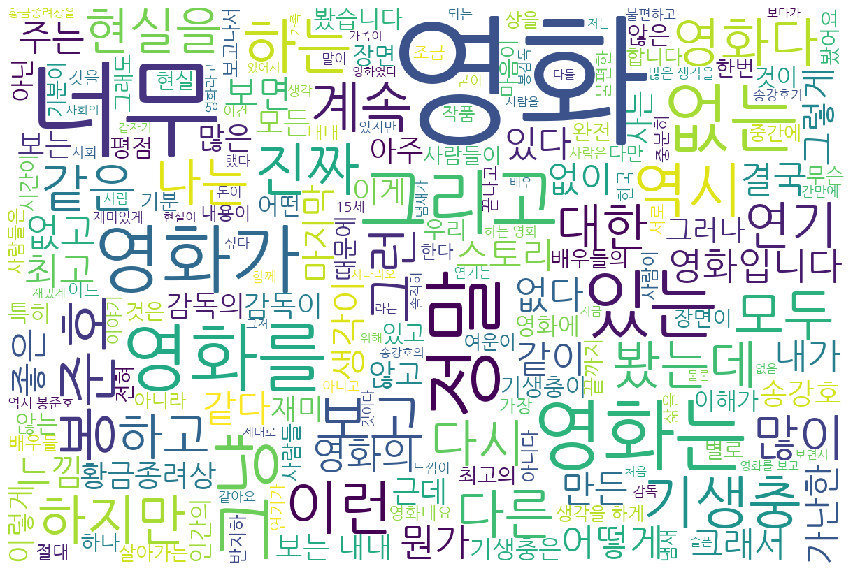

In [44]:
wordcloud = WordCloud(max_font_size=200,font_path='C:\\WINDOWS\\Fonts\\NanumGothic.ttf',\
                      stopwords=STOPWORDS,background_color='#FFFFFF',width=1200,height=800).generate(text_para)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')